In [8]:
import pandas as pd
import numpy as np


num_cities = 100000

np.random.seed(107)

cities = []
for i in range(num_cities):
    city = {
        'Population': np.random.randint(1000, 1000000),
        'Latitude': np.random.uniform(0, 40),
        'Longitude': np.random.uniform(0, 60),
        'Area': np.random.randint(50, 1000),
        'GDP': np.random.uniform(0, 100),
        'High education': np.random.uniform(0, 0.4),
        'Ad budget': np.random.uniform(0, 1000000)
    }
    
    
    # city['Income'] = (
        # city['GDP'] * city['Population'] * 0.001 +
        # city['High education'] * 50000 +
        # city['Ad budget'] * 0.0001 +
        # city['Area'] * 10 +
        # (40 - city['Latitude']) * 1000 +
        # (60 - city['Longitude']) * 1000
    # )
    city['Income'] = (
        city['Population'] * city['Ad budget'] * 0.00001
    )

    cities.append(city)


df = pd.DataFrame(cities)
df.head()


,Population,Latitude,Longitude,Area,GDP,High education,Ad budget,Income
0,461862,39.642326,32.172610,381,22.526441,0.136505,152491.226921,7.042990e+05
1,948090,27.759139,21.799416,603,59.977281,0.388389,702063.933425,6.656198e+06
2,956048,28.593951,7.735642,513,20.939241,0.315871,818388.601632,7.824188e+06
3,780270,29.406730,2.384702,674,54.931801,0.032674,460493.313714,3.593091e+06
4,19953,17.394419,17.878825,647,25.797180,0.398341,384495.324809,7.671835e+04


In [9]:
df.describe()


,Population,Latitude,Longitude,Area,GDP,High education,Ad budget,Income
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,500250.253950,20.037188,30.030423,523.144450,50.122833,0.199964,500589.738239,2.505616e+06
std,289144.376184,11.523929,17.348260,273.776593,28.794586,0.115564,288248.997124,2.208221e+06
min,1015.000000,0.000411,0.001225,50.000000,0.001526,0.000006,32.999531,1.136016e+01
25%,249088.250000,10.106192,14.889579,286.000000,25.291792,0.100168,252051.524000,6.844455e+05
50%,499825.500000,20.013065,30.072954,522.000000,50.139756,0.199838,499513.729282,1.869659e+06
75%,751279.500000,30.007700,45.087395,759.000000,75.003298,0.300235,750337.736613,3.830145e+06
max,999998.000000,39.999829,59.998941,999.000000,99.999850,0.399997,999983.929245,9.969014e+06


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df[['Population', 'Latitude', 'Longitude', 'Area', 'GDP', 'High education', 'Ad budget']].values
y = df['Income'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),  
    # Dense(16, activation='relu'),  
    Dense(1)  
])


model.compile(optimizer='adam', loss='mean_squared_error')


history = model.fit(X_train, y_train, epochs=70, batch_size=32, validation_split=0.2)


Epoch 1/70


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 254us/step - loss: 11097942786048.0000 - val_loss: 10434330492928.0000
Epoch 2/70
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - loss: 9227828461568.0000 - val_loss: 6885505236992.0000
Epoch 3/70
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - loss: 5891684827136.0000 - val_loss: 4446556258304.0000
Epoch 4/70
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - loss: 4124859957248.0000 - val_loss: 4048149282816.0000
Epoch 5/70
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - loss: 3899251752960.0000 - val_loss: 3819680301056.0000
Epoch 6/70
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - loss: 3620641964032.0000 - val_loss: 3549762945024.0000
Epoch 7/70
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - loss: 3402337878016.0000 - val_loss: 3246065451008.0000
Epoch 8/70
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - loss: 3051499028480.0000 - val_loss: 2893121585152.0000
Epoch 9/70
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - loss: 2723234971648.0000 - val_loss: 24

625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 145us/step - loss: 193862254592.0000


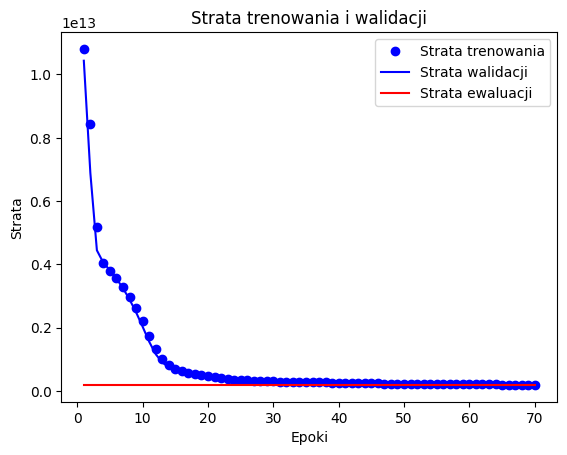

In [12]:
evaluated = model.evaluate(X_test, y_test)

history_dict = history.history


import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')

# plot evaluation
# evaluated = model.evaluate(X_test, y_test)
plt.plot(epochs, [evaluated] * len(epochs), 'r', label='Strata ewaluacji')

plt.title('Strata trenowania i walidacji')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()
plt.show()


In [13]:
res = model.predict(X_test[:10])
    
for i in range(10):
    print(res[i][0]-y_test[i])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1461074.635162251
261696.82881780277
-208672.39433651324
1313111.9341802476
373515.63602543436
-237258.6991256387
506954.17656923644
185371.45428171827
33649.962549864314
410661.22430738737


In [14]:
y_test[:10]

array([  65101.98983775,  289053.7961822 , 8068924.89433651,
        762968.19081975, 3865776.36397457, 2087104.19912564,
        188947.38593076,  156141.48321828, 5140588.53745014,
        546556.83819261])